## Facial Expression Recognition using CNN

The task is to classify facial expressions into one of **7 categories** using deep learning (CNN).  
The dataset used is **FER2013** from [Kaggle](https://www.kaggle.com/datasets/msambare/fer2013), containing grayscale **48x48** pixel face images.

### Emotion Classes:
- **0** = Angry  
- **1** = Disgust  
- **2** = Fear  
- **3** = Happy  
- **4** = Sad  
- **5** = Surprise  
- **6** = Neutral


In [3]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets, models, utils
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder

# Utils
import os
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix


This is a multi-class classification problem. We will use Convolutional Neural Networks (CNN) to learn spatial features from the face images and predict one of the 7 emotions.



In [4]:
# Define image transformations for training and testing
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # FER2013 is grayscale
    transforms.Resize((48, 48)),                  # just in case
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))          # normalize to [-1, 1]
])

# Define paths
train_dir = './../data/train'
test_dir = './../data/test'

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Map class indices to emotion names
emotion_labels = train_dataset.classes
print("Emotion labels:", emotion_labels)

Emotion labels: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


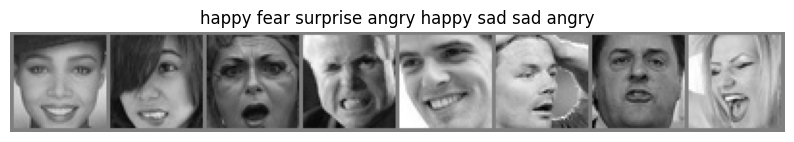

In [5]:

# Function to unnormalize image
def imshow(img, title):
    img = img * 0.5 + 0.5  # unnormalize from [-1,1] to [0,1]
    npimg = img.numpy()
    plt.figure(figsize=(10,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Get a batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images and their corresponding labels
imshow(utils.make_grid(images[:8], nrow=8), 
       title=' '.join(emotion_labels[labels[j]] for j in range(8)))
